In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 라이브러리 추가
import numpy as np
import pandas as pd
import re
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Komoran 불러오기
from konlpy.tag import Komoran
komoran = Komoran()

In [4]:
# 키워드
df = pd.read_excel('/Users/charles/git/metaverse/data/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df[['키워드']].to_csv('/Users/charles/git/metaverse/data/bigkinds_keywords.txt', index=False, header=False)
f = open("/Users/charles/git/metaverse/data/bigkinds_keywords.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [5]:
# 단어 2차원 리스트
word = []
for i in range(len(lines)):
    word.append(komoran.nouns(lines[i]))
word = [[y for y in x if not len(y)==1] for x in word]   # 2자 이상 
word = [[y for y in x if not y.isdigit()] for x in word] # 숫자판별

In [6]:
# 단어 1차원 리스트 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

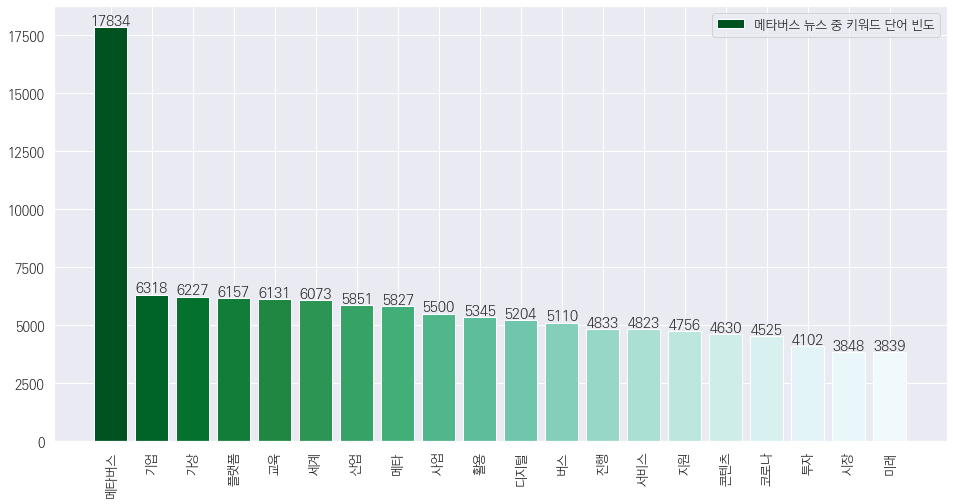

In [7]:
# 단어빈도
df = pd.DataFrame({'단어':flatten(word)})
value_counts = df['단어'].value_counts(dropna=True, sort=True)
df = pd.DataFrame(value_counts).reset_index()
df.columns = ['단어', '빈도']
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
f, ax = plt.subplots(figsize=(16, 8))
plot = ax.bar(df[:20]['단어'], df[:20]['빈도'], color=sns.color_palette("BuGn_r", df[:20]['단어'].size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticklabels(df[:20]['단어'], rotation='vertical') 
plt.legend(labels=['메타버스 뉴스 중 키워드 단어 빈도'], loc='upper right')

In [8]:
# 어프라이어리(Apriori)
from apyori import apriori
# 지지도(support): P(A∩B)
result=(list(apriori(word, min_support=0.05)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
                  (df['support'] >= 0.05)].sort_values(by='support', ascending=False)
df.head(20)

,items,support,ordered_statistics,length
206,"(메타버스, 플랫폼)",0.154846,"[((), (메타버스, 플랫폼), 0.15484569572279372, 1.0), ...",2
215,"(메타버스, 활용)",0.150514,"[((), (메타버스, 활용), 0.1505143475906876, 1.0), ((...",2
175,"(세계, 메타버스)",0.146785,"[((), (세계, 메타버스), 0.14678457558804067, 1.0), (...",2
148,"(메타, 버스)",0.144739,"[((), (메타, 버스), 0.14473921674787946, 1.0), ((메...",2
198,"(메타버스, 진행)",0.144559,"[((), (메타버스, 진행), 0.1445587439090417, 1.0), ((...",2
90,"(메타버스, 가상)",0.137580,"[((), (가상, 메타버스), 0.13758046080731517, 1.0), (...",2
147,"(메타, 메타버스)",0.134813,"[((), (메타, 메타버스), 0.13481321061180293, 1.0), (...",2
165,"(메타버스, 버스)",0.123624,"[((), (메타버스, 버스), 0.12362389460386213, 1.0), (...",2
202,"(메타버스, 코로나)",0.122300,"[((), (메타버스, 코로나), 0.12230042711905191, 1.0), ...",2
128,"(메타버스, 기업)",0.116164,"[((), (메타버스, 기업), 0.11616435059856825, 1.0), (...",2


In [9]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

# 레이아웃
# pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.bipartite_layout(G)
# pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)

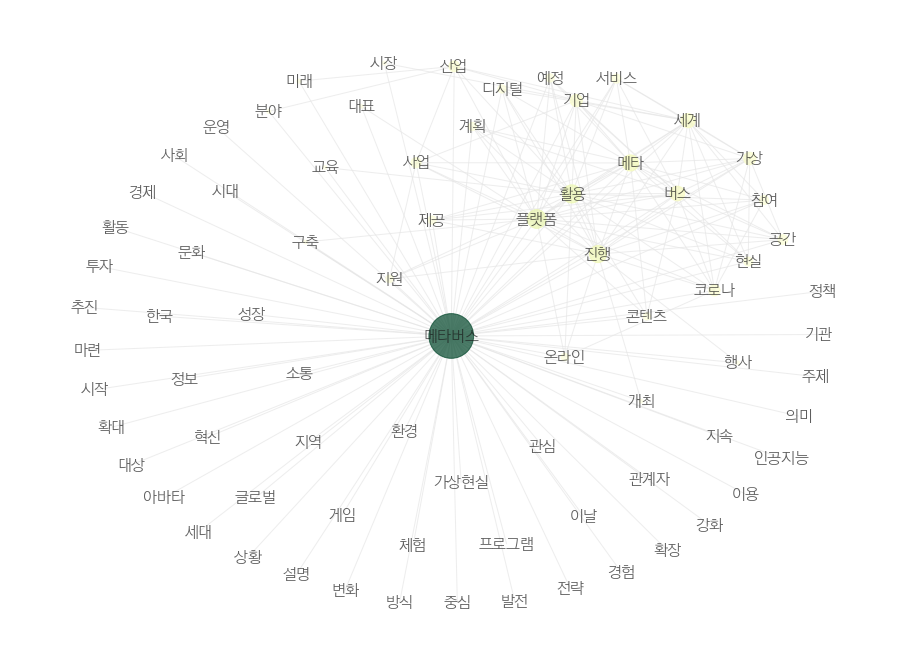

In [10]:
# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.9', cmap=plt.cm.YlGn)
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_keywords_network.png', bbox_inches='tight')

In [11]:
# 제목
df = pd.read_excel('/Users/charles/git/metaverse/data/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df[['제목']].to_csv('/Users/charles/git/metaverse/data/bigkinds_title.txt', index=False, header=False)
f = open("/Users/charles/git/metaverse/data/bigkinds_title.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [12]:
# 단어 2차원 리스트
word = []
for i in range(len(lines)):
    word.append(komoran.nouns(lines[i]))
word = [[y for y in x if not len(y)==1] for x in word]   # 2자 이상 
word = [[y for y in x if not y.isdigit()] for x in word] # 숫자판별

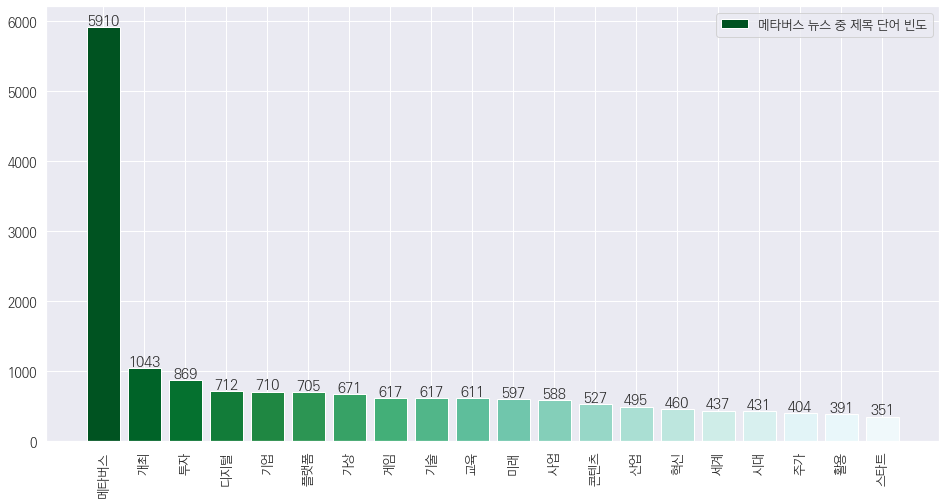

In [13]:
# 단어빈도
df = pd.DataFrame({'단어':flatten(word)})
value_counts = df['단어'].value_counts(dropna=True, sort=True)
df = pd.DataFrame(value_counts).reset_index()
df.columns = ['단어', '빈도']
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
f, ax = plt.subplots(figsize=(16, 8))
plot = ax.bar(df[:20]['단어'], df[:20]['빈도'], color=sns.color_palette("BuGn_r", df[:20]['단어'].size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticklabels(df[:20]['단어'], rotation='vertical') 
plt.legend(labels=['메타버스 뉴스 중 제목 단어 빈도'], loc='upper right')

In [14]:
# 어프라이어리(Apriori)
from apyori import apriori
# 지지도(support): P(A∩B)
result=(list(apriori(word, min_support=0.007)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
                  (df['support'] >= 0.007)].sort_values(by='support', ascending=False)
df.head(20)

,items,support,ordered_statistics,length
159,"(메타버스, 플랫폼)",0.024662,"[((), (메타버스, 플랫폼), 0.024661654135338346, 1.0),...",2
135,"(메타버스, 개최)",0.023158,"[((), (메타버스, 개최), 0.023157894736842106, 1.0), ...",2
160,"(메타버스, 활용)",0.019308,"[((), (메타버스, 활용), 0.01930827067669173, 1.0), (...",2
133,"(메타버스, 가상)",0.017323,"[((), (가상, 메타버스), 0.017323308270676692, 1.0), ...",2
142,"(메타버스, 기업)",0.015699,"[((), (메타버스, 기업), 0.01569924812030075, 1.0), (...",2
158,"(투자, 메타버스)",0.015278,"[((), (투자, 메타버스), 0.015278195488721804, 1.0), ...",2
137,"(메타버스, 교육)",0.014677,"[((), (메타버스, 교육), 0.014676691729323309, 1.0), ...",2
146,"(메타버스, 사업)",0.012391,"[((), (메타버스, 사업), 0.012390977443609022, 1.0), ...",2
150,"(시대, 메타버스)",0.011609,"[((), (시대, 메타버스), 0.011609022556390977, 1.0), ...",2
141,"(메타버스, 기술)",0.011188,"[((), (메타버스, 기술), 0.01118796992481203, 1.0), (...",2


In [15]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

# 레이아웃
# pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.bipartite_layout(G)
# pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)

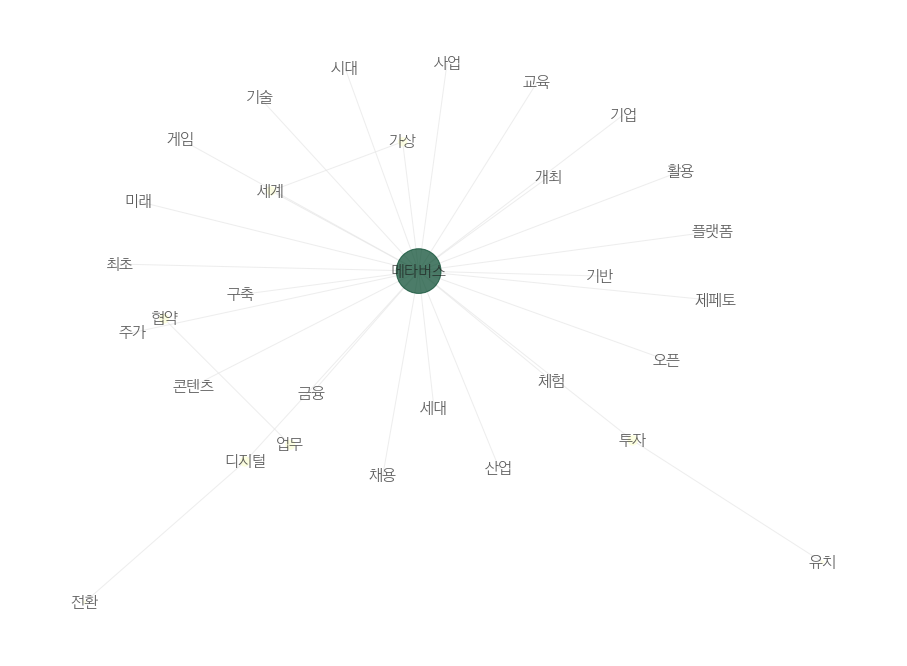

In [16]:
# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.9', cmap=plt.cm.YlGn)
plt.savefig('/Users/charles/git/metaverse/image/bigkinds_title_network.png', bbox_inches='tight')